### AED - Analise Exploratoria de Dados

Instalando serviços necessários.


In [1]:
!pip install pyodbc
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\André PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\André PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\André PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Importando pyodbc e buscando o drive do banco de dados que vai ser conectado.

In [1]:
import pyodbc
pyodbc.drivers()

['SQL Server',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

Importanto mensagens de erro e bibliotecas.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x:'%.2f' % x)


Conectando com o banco de dados.


In [3]:
conn = pyodbc.connect(Trusted_connection='Yes',
                      DRIVER = '{ODBC Driver 17 for SQL Server}',
                      SERVER = 'DESKTOP-IL42DTP',
                      DATABASE = 'armazemdedados')
                      
cursor = conn.cursor

Consultando tabelas no SQL Server

In [4]:
SQL_Query = pd.read_sql_query('select * FROM fato_vendas', conn)
fato_vendas = pd.DataFrame(SQL_Query)

In [5]:
fato_vendas

,CodigoVenda,DataVenda,CodigoCliente,CodigoProduto,QuantidadeVenda,ValorUnitarioVenda,ValorTotalVenda,CodigoVendedor,CodigoCanalVendas,CodigoStatus,Deletado
0,1,2022-04-01,1,1,4000,0.34,1360.00,1,1,1,0
1,2,2022-04-02,2,2,1000,0.50,500.00,2,1,1,0
2,3,2022-04-03,3,3,2000,0.80,1600.00,3,2,3,0
3,4,2022-04-04,4,4,3000,0.90,2700.00,4,1,1,0
4,5,2022-04-05,5,5,4000,0.40,1600.00,5,2,2,0
5,6,2022-04-06,6,6,4000,1.00,4000.00,6,1,1,0
6,7,2022-04-07,7,7,2000,0.70,1400.00,7,1,1,0
7,8,2022-04-08,8,8,1000,0.35,350.00,8,2,1,0
8,9,2022-04-09,9,9,5000,0.80,4000.00,9,1,1,0
9,10,2022-04-10,10,10,1000,0.52,520.00,10,2,1,0


In [6]:
SQL_Query = pd.read_sql_query('select * FROM dim_produto', conn)
dim_produto = pd.DataFrame(SQL_Query)

In [7]:
dim_produto

,CodigoProduto,NomeProduto,TipoProduto,UnidadeProduto,SaldoProduto,StatusProduto
0,1,Produto A,A,KG,20000,Ativo
1,2,Produto N,B,KG,10000,Ativo
2,3,Produto F,C,KG,20000,Ativo
3,4,Produto S,A,KG,20000,Ativo
4,5,Produto W,C,KG,30000,Ativo
5,6,Produto U,B,KG,20000,Ativo
6,7,Produto Z,X,KG,20000,Ativo
7,8,Produto L,Q,KG,20000,Ativo
8,9,Produto O,A,KG,10000,Ativo
9,10,Produto I,X,KG,15000,Ativo


In [8]:
SQL_Query = pd.read_sql_query('select * FROM dim_cliente', conn)
dim_cliente = pd.DataFrame(SQL_Query)

In [9]:
dim_cliente

,CodigoCliente,NomeCliente,IdadeCliente,ClassificacaoCliente,SexoCliente,CidadeCliente,EstadoCliente,PaisCliente
0,1,CLIENTE A,18,1,M,Fortaleza,Ceará,Brasil
1,2,CLIENTE B,32,3,M,São Benedito,Ceará,Brasil
2,3,CLIENTE C,35,4,M,Fortaleza,Ceará,Brasil
3,4,CLIENTE D,40,2,F,Viçosa,Ceará,Brasil
4,5,CLIENTE E,31,5,F,Tianguá,Ceará,Brasil
5,6,CLIENTE F,21,5,F,Rio Branco,Acre,Brasil
6,7,CLIENTE G,37,2,F,Rio de Janeiro,Rio de Janeiro,Brasil
7,8,CLIENTE H,20,5,F,Brasília,Distrito Federal,Brasil
8,9,CLIENTE I,35,3,F,Juazeiro do Norte,Ceará,Brasil
9,10,CLIENTE J,60,2,M,Ipú,Ceará,Brasil


In [10]:
sql = """
        SELECT *
        FROM fato_vendas ven
        LEFT JOIN dim_produto pro ON pro.CodigoProduto = ven.CodigoProduto;
      """
pd.read_sql(sql, conn)

,CodigoVenda,DataVenda,CodigoCliente,CodigoProduto,QuantidadeVenda,ValorUnitarioVenda,ValorTotalVenda,CodigoVendedor,CodigoCanalVendas,CodigoStatus,Deletado,CodigoProduto,NomeProduto,TipoProduto,UnidadeProduto,SaldoProduto,StatusProduto
0,1,2022-04-01,1,1,4000,0.34,1360.00,1,1,1,0,1,Produto A,A,KG,20000,Ativo
1,2,2022-04-02,2,2,1000,0.50,500.00,2,1,1,0,2,Produto N,B,KG,10000,Ativo
2,3,2022-04-03,3,3,2000,0.80,1600.00,3,2,3,0,3,Produto F,C,KG,20000,Ativo
3,4,2022-04-04,4,4,3000,0.90,2700.00,4,1,1,0,4,Produto S,A,KG,20000,Ativo
4,5,2022-04-05,5,5,4000,0.40,1600.00,5,2,2,0,5,Produto W,C,KG,30000,Ativo
5,6,2022-04-06,6,6,4000,1.00,4000.00,6,1,1,0,6,Produto U,B,KG,20000,Ativo
6,7,2022-04-07,7,7,2000,0.70,1400.00,7,1,1,0,7,Produto Z,X,KG,20000,Ativo
7,8,2022-04-08,8,8,1000,0.35,350.00,8,2,1,0,8,Produto L,Q,KG,20000,Ativo
8,9,2022-04-09,9,9,5000,0.80,4000.00,9,1,1,0,9,Produto O,A,KG,10000,Ativo
9,10,2022-04-10,10,10,1000,0.52,520.00,10,2,1,0,10,Produto I,X,KG,15000,Ativo


In [11]:
# USANDO WINDOW FUNCTION
sqlwf = """
        SELECT codigocliente,
        year(DataVenda) AS ano,
        codigoProduto,
        QuantidadeVenda,
        SUM(QuantidadeVenda) OVER(PARTITION BY codigocliente)       AS quantidade_por_cliente,
        SUM(QuantidadeVenda) OVER(PARTITION BY codigocliente, year(DataVenda)) AS quantidade_por_cliente_ano
        FROM fato_vendas
        ORDER BY codigocliente, year(DataVenda), QuantidadeVenda;
        """
pd.read_sql(sqlwf, conn)

,codigocliente,ano,codigoProduto,QuantidadeVenda,quantidade_por_cliente,quantidade_por_cliente_ano
0,1,2022,1,4000,4000,4000
1,2,2022,2,1000,1000,1000
2,3,2022,3,2000,2000,2000
3,4,2022,4,3000,3000,3000
4,5,2022,5,4000,4000,4000
5,6,2022,6,4000,4000,4000
6,7,2022,7,2000,2000,2000
7,8,2022,8,1000,1000,1000
8,9,2022,9,5000,5000,5000
9,10,2022,10,1000,1000,1000


Selecionando o número de clusters através do método Elbow (Soma da distancia quadraticos instra cluster).

In [12]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\André PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
from sklearn.cluster import KMeans

In [14]:
# Relação entre idade e quantidade comprada
sql1 = """
        SELECT v.*,
              c.NomeCliente,
              c.IdadeCliente    AS  Idade,
              c.ClassificacaoCliente    AS  Classificacao,
              c.SexoCliente     AS  Sexo,
              c.CidadeCliente   AS  Cidade,
              c.EstadoCliente   AS  Estado,
              PaisCliente       AS  Pais
        FROM fato_vendas v
        JOIN dim_cliente c ON c.codigocliente = v.CodigoCliente;
       """
SQL_Query = pd.read_sql(sql1, conn)
IdadeQuantidade = pd.DataFrame(SQL_Query)


In [15]:
IdadeQuantidade

,CodigoVenda,DataVenda,CodigoCliente,CodigoProduto,QuantidadeVenda,ValorUnitarioVenda,ValorTotalVenda,CodigoVendedor,CodigoCanalVendas,CodigoStatus,Deletado,NomeCliente,Idade,Classificacao,Sexo,Cidade,Estado,Pais
0,1,2022-04-01,1,1,4000,0.34,1360.00,1,1,1,0,CLIENTE A,18,1,M,Fortaleza,Ceará,Brasil
1,2,2022-04-02,2,2,1000,0.50,500.00,2,1,1,0,CLIENTE B,32,3,M,São Benedito,Ceará,Brasil
2,3,2022-04-03,3,3,2000,0.80,1600.00,3,2,3,0,CLIENTE C,35,4,M,Fortaleza,Ceará,Brasil
3,4,2022-04-04,4,4,3000,0.90,2700.00,4,1,1,0,CLIENTE D,40,2,F,Viçosa,Ceará,Brasil
4,5,2022-04-05,5,5,4000,0.40,1600.00,5,2,2,0,CLIENTE E,31,5,F,Tianguá,Ceará,Brasil
5,6,2022-04-06,6,6,4000,1.00,4000.00,6,1,1,0,CLIENTE F,21,5,F,Rio Branco,Acre,Brasil
6,7,2022-04-07,7,7,2000,0.70,1400.00,7,1,1,0,CLIENTE G,37,2,F,Rio de Janeiro,Rio de Janeiro,Brasil
7,8,2022-04-08,8,8,1000,0.35,350.00,8,2,1,0,CLIENTE H,20,5,F,Brasília,Distrito Federal,Brasil
8,9,2022-04-09,9,9,5000,0.80,4000.00,9,1,1,0,CLIENTE I,35,3,F,Juazeiro do Norte,Ceará,Brasil
9,10,2022-04-10,10,10,1000,0.52,520.00,10,2,1,0,CLIENTE J,60,2,M,Ipú,Ceará,Brasil


Escolher melhor Cluster.

In [16]:
X2 = IdadeQuantidade[['QuantidadeVenda' , 'Classificacao']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_) 

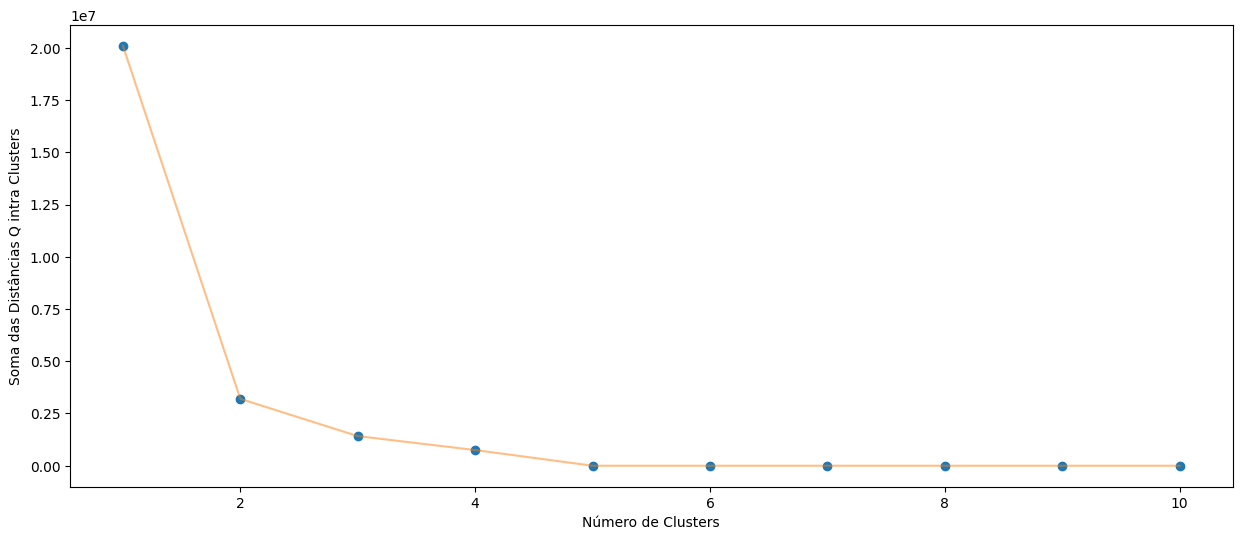

In [17]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , "o")
plt.plot(np.arange(1 , 11) , inertia , "-" , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

Inicializando e computando o KMeans com valor de 4 clusters.

In [18]:
algorithm = (KMeans(n_clusters = 4))
algorithm.fit(X2)

KMeans(n_clusters=4)

In [19]:
# Visualisando os dados agrupados
IdadeQuantidade["clusters"] = algorithm.labels_

In [20]:
IdadeQuantidade

,CodigoVenda,DataVenda,CodigoCliente,CodigoProduto,QuantidadeVenda,ValorUnitarioVenda,ValorTotalVenda,CodigoVendedor,CodigoCanalVendas,CodigoStatus,Deletado,NomeCliente,Idade,Classificacao,Sexo,Cidade,Estado,Pais,clusters
0,1,2022-04-01,1,1,4000,0.34,1360.00,1,1,1,0,CLIENTE A,18,1,M,Fortaleza,Ceará,Brasil,1
1,2,2022-04-02,2,2,1000,0.50,500.00,2,1,1,0,CLIENTE B,32,3,M,São Benedito,Ceará,Brasil,2
2,3,2022-04-03,3,3,2000,0.80,1600.00,3,2,3,0,CLIENTE C,35,4,M,Fortaleza,Ceará,Brasil,0
3,4,2022-04-04,4,4,3000,0.90,2700.00,4,1,1,0,CLIENTE D,40,2,F,Viçosa,Ceará,Brasil,0
4,5,2022-04-05,5,5,4000,0.40,1600.00,5,2,2,0,CLIENTE E,31,5,F,Tianguá,Ceará,Brasil,1
5,6,2022-04-06,6,6,4000,1.00,4000.00,6,1,1,0,CLIENTE F,21,5,F,Rio Branco,Acre,Brasil,1
6,7,2022-04-07,7,7,2000,0.70,1400.00,7,1,1,0,CLIENTE G,37,2,F,Rio de Janeiro,Rio de Janeiro,Brasil,0
7,8,2022-04-08,8,8,1000,0.35,350.00,8,2,1,0,CLIENTE H,20,5,F,Brasília,Distrito Federal,Brasil,2
8,9,2022-04-09,9,9,5000,0.80,4000.00,9,1,1,0,CLIENTE I,35,3,F,Juazeiro do Norte,Ceará,Brasil,3
9,10,2022-04-10,10,10,1000,0.52,520.00,10,2,1,0,CLIENTE J,60,2,M,Ipú,Ceará,Brasil,2


In [23]:
df_group = IdadeQuantidade.drop(['CodigoVenda','DataVenda','CodigoCliente','CodigoProduto','ValorUnitarioVenda','ValorTotalVenda','CodigoVendedor','CodigoCanalVendas','CodigoStatus','Deletado','Idade','Classificacao'],axis=1)

In [24]:
#Disposição das quantidade de Vendas nos clusters
df_group.describe()

,QuantidadeVenda,clusters
count,10.00,10.00
mean,2700.00,1.20
std,1494.43,1.03
min,1000.00,0.00
25%,1250.00,0.25
50%,2500.00,1.00
75%,4000.00,2.00
max,5000.00,3.00
